<a href="https://colab.research.google.com/github/Datamin-D/movie_predict/blob/master/Movie_predict_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preprocessing

##1.데이터 합치기 

26개 다운로드 후, **나 '추후에' 검색해서 바꾸기.

In [8]:
import pandas as pd
import numpy as np
import re
import pickle

In [9]:
#구글드라이브 마운트
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [10]:
#[원래 코드]
#구글 드라이브에서 파일 다운로드 
df_list = []
[df_list.append("df"+str(df_no)) for df_no in range(3)]
print(df_list)
for data_ind in range(3):
  path = "/gdrive/My Drive/movie/"+"movie_data_"+str(data_ind)+".csv"
  print("path:",path)
  df_list[data_ind] = pd.read_csv(path,index_col = "Movie_title") #pd.read_csv('폴더경로',index_col = "column이름")
  
#나중에 다운받으면 수정

['df0', 'df1', 'df2']
path: /gdrive/My Drive/movie/movie_data_0.csv


FileNotFoundError: ignored

In [14]:
#[실제 코드]
#1. 구글 드라이브에서 Movie_data 다운로드, 합치기 
df = pd.DataFrame()
df_list = []
[df_list.append("df"+str(df_no)) for df_no in range(26)]#일단 5까지만** 추후에 26으로 고치기
print('df_list:',df_list)
df = pd.DataFrame(data = None) #첫번째 df. 빔. 빈 df 만들기: pd.DataFrame(data = None)

for data_ind, df_element in zip(range(26),df_list): #**추후에 바꿔 range(26)으로 #ZIP 함수를 활용해서 for i,j in zip(--,--): 이렇게 변수 두개 쓸 수도 있음. 
  #path = "/gdrive/My Drive/movie/"+"movie_data_"+str(data_ind)+".csv"
  path = "/gdrive/My Drive/movie_predict/movie_data_"+str(data_ind)+".csv"
  print("path:",path)
  print(df_element)


  df_element = pd.read_csv(path, index_col = "Movie_title") #pd.read_csv('폴더경로',index_col = "column이름") 
  print(df_element)
  df = pd.concat([df, df_element]) #df0,df1,df2,...

#df.describe()
df
  #이렇게 하면 df_list의 값에 바로 pd가 지정되는게 아니라 ex) 'df_list[data_ind]'가 pd로 지정됨. 각각 list안에값을 변수 이름으로 하고프면



df_list: ['df0', 'df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7', 'df8', 'df9', 'df10', 'df11', 'df12', 'df13', 'df14', 'df15', 'df16', 'df17', 'df18', 'df19', 'df20', 'df21', 'df22', 'df23', 'df24', 'df25']
path: /gdrive/My Drive/movie_predict/movie_data_0.csv
df0
                            Unnamed: 0  ...   Domestic_distributor
Movie_title                             ...                       
American Animals (2018)              1  ...            The Orchard
Step Up Revolution (2012)            3  ...              Lionsgate
Bad News Bears (2005)                4  ...     Paramount Pictures
American Assassin (2017)             7  ...              Lionsgate
Ek Thi Daayan (2013)                13  ...     Eros International
...                                ...  ...                    ...
Committed (2000)                   991  ...                Miramax
The Expendables (2010)             992  ...              Lionsgate
Stop-Loss (2008)                   995  ...     Paramount Pictur

,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor
Movie_title,,,,,,,,,,,,,,,,
American Animals (2018),1,"['Documentary', 'Biography', 'Crime']",['7.0'],"35,319",['1h 56min'],NaN,"$2,856,954","$134,793, 3 June 2018","$4,080,073","['English ', ' Dutch']",['Bart Layton'],"['Bart Layton', 'Claudia Zie', 'Ed Wethered', ...","['Spencer Reinhard ...', 'Warren Lipka ...', '...",['R'],14 August 2018,The Orchard
Step Up Revolution (2012),3,"['Drama', 'Music', 'Romance']",['6.4'],"52,827",['1h 39min'],"$33,000,000 (estimated)","$35,074,677","$11,731,708, 29 July 2012","$140,470,746",['English'],['Scott Speer'],"['Amanda Brody', 'Duane Adler']","['Cleopatra Coleman', 'Ryan Guzman', 'Misha Ga...",['PG-13'],27 July 2012,Lionsgate
Bad News Bears (2005),4,"['Comedy', 'Sport']",['5.8'],"19,924",['1h 53min'],"$35,000,000 (estimated)","$32,868,349","$11,382,472, 24 July 2005","$34,252,847","['English ', ' Spanish']",['Richard Linklater'],"['Bill Lancaster', 'Glenn Ficarra', 'John Requ...","['Billy Bob Thornton', 'Greg Kinnear ...', 'Ma...","['TV-14', 'PG-13']",22 July 2005,Paramount Pictures
American Assassin (2017),7,"['Action', 'Thriller']",['6.2'],"65,944",['1h 52min'],"$33,000,000 (estimated)","$36,249,674","$14,846,778, 17 September 2017","$67,234,188","['English ', ' Spanish ', ' Arabic ', ' Polish...",['Michael Cuesta'],"['Stephen Schiff', 'Michael Finch', 'Edward Zw...","[""Dylan O'Brien"", 'Charlotte Vega', 'Christoph...",['R'],15 September 2017,Lionsgate
Ek Thi Daayan (2013),13,"['Horror', 'Romance', 'Thriller']",['5.7'],"3,770",['2h 15min'],NaN,"$112,135","$65,857, 21 April 2013","$206,279",['Hindi'],['Kannan Iyer'],"['Vishal Bhardwaj', 'Vishal Bhardwaj', 'Mukul ...","['Emraan Hashmi', 'Konkona Sen Sharma', 'Kalki...",['Not Rated'],15 September 2017,Eros International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Devil's Miner (2005),134,['Documentary'],['7.6'],538,['1h 22min'],NaN,"$14,289","$4,393, 19 March 2006","$14,289",['Spanish'],"['Kief Davidson', 'Richard Ladkani']","['Richard Ladkani', 'Kief Davidson']",[],['Not Rated'],22 February 2019,First Run
Madame de... (1953),135,"['Drama', 'Romance']",['8.0'],"8,544",['1h 45min'],NaN,"$130,561","$15,409, 18 March 2007","$135,636","['French ', ' Turkish']",['Max Oph'],"['Louise de Vilmorin', 'Marcel Achard', 'Max O...","['Charles Boyer', 'Danielle Darrieux', 'Vittor...",['Not Rated'],19 July 1954,NaN
Paranormal Activity 2 (2010),136,['Horror'],['5.6'],"96,796",['1h 31min'],"$3,000,000 (estimated)","$84,752,907","$40,678,424, 24 October 2010","$177,512,032","['English ', ' Spanish']",['Tod Williams'],"['Michael R. Perry', 'Christopher Landon', 'To...","['David Bierend', 'Brian Boland', 'Molly Ephra...",['R'],22 October 2010,Paramount Pictures


In [12]:
Movie_titles = df.index.to_list


with open("/gdrive/My Drive/movie_predict/Movie_titles","wb") as fw:
    pickle.dump(Movie_titles, fw)

In [16]:
with open("/gdrive/My Drive/movie_predict/Movie_titles","rb") as fr:
    data = pickle.load(fr)

print(data)

<bound method IndexOpsMixin.tolist of Index([], dtype='object')>


In [20]:
df.index[0]

'American Animals (2018)'

In [23]:
#뒤에 ()가 2000-2019가 아닌놈들 정규표현식으로 걸러내기. 몇개인지 파악, ㄱㅊ하면 육안으로 없애기.

#()정규표현식 
years = [i for i in range(2000,2020)]
print(years)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [ ]:
while 1:
  p = re.search('(.*)([0-9]{4})',df.index[i])
  if p.group(2) not in years:
    continue
  i = i + 1
  if i == 12392:
    break
count, 연도 다른 영화이름도 넣기.
#df.title 몇개?

## 2. 전처리

#### Genre

In [ ]:
#Genre 전처리

#pd.get_dummies(df, columns = ['Genre'])
#pd.get_dummies(df['Genre'])
#Genre.head()
df['Genre'] #df['column이름'] 또는 df.컬럼이름 으로 df보기 가능. (df.Genre)이렇게

Movie_title
American Animals (2018)                         ['Documentary', 'Biography', 'Crime']
Step Up Revolution (2012)                               ['Drama', 'Music', 'Romance']
Bad News Bears (2005)                                             ['Comedy', 'Sport']
American Assassin (2017)                                       ['Action', 'Thriller']
Ek Thi Daayan (2013)                                ['Horror', 'Romance', 'Thriller']
                                                                ...                  
Screen Door Jesus (2003)                               ['Comedy', 'Drama', 'Fantasy']
Fracture (2007)                                        ['Crime', 'Drama', 'Thriller']
Ferdinand (2017)                                 ['Animation', 'Adventure', 'Comedy']
L'odyssée d'Alice Tremblay (2002)                     ['Comedy', 'Family', 'Fantasy']
Revelation: Dawn of Global Government (2016)                          ['Documentary']
Name: Genre, Length: 11762, dtype: object

In [ ]:
delete_lists = ["[","]","'"]
# 1. ',[,] 지우기

df["Genre"] = df["Genre"].str.replace("'","")
df["Genre"] = df["Genre"].str.replace("[","")
df["Genre"] = df["Genre"].str.replace("]","")
print(df["Genre"])

Movie_title
American Animals (2018)             Documentary, Biography, Crime
Step Up Revolution (2012)                   Drama, Music, Romance
Bad News Bears (2005)                               Comedy, Sport
American Assassin (2017)                         Action, Thriller
Ek Thi Daayan (2013)                    Horror, Romance, Thriller
                                                ...              
The Remains (2016)                               Horror, Thriller
Tiger Zinda Hai (2017)                Action, Adventure, Thriller
Won't You Be My Neighbor? (2018)           Documentary, Biography
xXx: State of the Union (2005)           Action, Adventure, Crime
Anthropoid (2016)                        Action, Biography, Drama
Name: Genre, Length: 1436, dtype: object


In [ ]:
#질문
#2. 원핫 인코딩

Genre_iter = (set(x.split(",")) for x in df.Genre)
print("Genre_iter:", Genre_iter)
#1. 겉 괄호는 무엇인지? generator 찾아보기. 
#2. Genre_iter이 

#1)장르 고윳값 ex Action, Horror 등만 추출
Genre_set = sorted(set.union(*Genre_iter)) #sorted는 정렬 함수. *는 언패킹 기능.(괄호 벗기기)
print("Genre_set:", Genre_set)
# 집합1.union(집합2) 이렇게 하면 집합1,집합2의 합집합임!

Genre_iter: <generator object <genexpr> at 0x7fc4ce66b2b0>
Genre_set: ['', ' Action', ' Adventure', ' Animation', ' Biography', ' Comedy', ' Crime', ' Documentary', ' Drama', ' Family', ' Fantasy', ' History', ' Horror', ' Music', ' Musical', ' Mystery', ' News', ' Romance', ' Sci-Fi', ' Sport', ' Thriller', ' War', ' Western', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller']


In [ ]:
#연습용
#2. 원핫 인코딩

Genre_iter = [set(x.split(",")) for x in df.Genre]
print("Genre_iter:", Genre_iter)
#1. 겉 괄호는 무엇인지? generator 찾아보기. 
#2. Genre_iter이 

#1)장르 고윳값 ex Action, Horror 등만 추출
Genre_set = sorted(set.union(*Genre_iter)) #sorted는 정렬 함수. *는 언패킹 기능.(괄호 벗기기)
print("Genre_set:", Genre_set)
# 집합1.union(집합2) 이렇게 하면 집합1,집합2의 합집합임!
# {}는 집합임.

Genre_iter: [{' Crime', ' Biography', 'Documentary'}, {'Drama', ' Romance', ' Music'}, {'Comedy', ' Sport'}, {' Thriller', 'Action'}, {' Thriller', ' Romance', 'Horror'}, {' Thriller', 'Drama'}, {'Documentary'}, {'Drama', ' Romance', ' Musical'}, {' Crime', 'Documentary'}, {'Comedy', ' Drama'}, {'Comedy', ' Crime'}, {'Comedy', ' Drama', ' Romance'}, {'Drama', ' Sport', ' Family'}, {' Thriller', 'Drama', ' Mystery'}, {' Drama', 'Biography'}, {' Crime', ' Drama', 'Action'}, {'Comedy', ' Drama'}, {'Documentary'}, {' Crime', ' Comedy', 'Action'}, {'Documentary', ' Music'}, {'Comedy', ' Drama'}, {'Drama'}, {' Adventure', ' Family', 'Action'}, {' Fantasy', 'Action', ' Horror'}, {' History', ' Biography', 'Documentary'}, {'Drama'}, {'Drama', ' Romance'}, {' Biography', 'Documentary'}, {'Documentary'}, {' History', ' Biography', 'Documentary'}, {'Drama'}, {' Drama', 'Crime'}, {'Comedy', ' Drama', ' Romance'}, {' Thriller', 'Drama', ' Horror'}, {'Documentary'}, {' Thriller', 'Action', ' Horror'

In [ ]:
#2) 0행렬 만들어주기
Genre_mat = pd.DataFrame(np.zeros((len(df), len(Genre_set))), columns=Genre_set)
Genre_mat

,,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#해당하는 Genre에 1 채워주기. 논리? 이해 완료.
for i, genre in enumerate(df.Genre):
  Genre_mat.loc[i, genre.split(',')] = 1
  #print(Genre_mat.loc[i, genre.split(',')]) #if 안쓰고도 df.loc[i행,[컬럼1,컬럼2]]하면 df에서 해당하는 컬럼1,2에 접근 가능.
  #print(genre.split(',')) #['Documentary', ' Biography', ' Crime'] 이런식으로 나옴.
Genre_mat

,,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1432,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1433,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1434,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Certificate

In [ ]:
#distributor

In [ ]:
#lambda쓰는 법
(lambda x,y: x+y)(10,20) # (lambda 인자1,인자2 : 표현식)(인자1,인자2)로 한 줄 표현.

30

In [ ]:
"""
#[]'$ 등의 문자 없애기

#pd.get_dummies(df) 원핫인코딩할 때 사용!
#apply map 확인하기 -->안에 함수를 인자로 넣을 수 있음.
columns = df.columns[2:]
print(columns)

delete_lists = ["'","$"]
for column in columns:
  #column = '"'+column+'"'
  for del_ind in delete_lists:
    del_ind = '"'+del_ind+'"'
    print("지울 놈:",del_ind)
    df[column] = df[column].str.replace(del_ind,"")
df.head()
"""


'\n#[]\'$ 등의 문자 없애기\n\n#pd.get_dummies(df) 원핫인코딩할 때 사용!\n#apply map 확인하기 -->안에 함수를 인자로 넣을 수 있음.\ncolumns = df.columns[2:]\nprint(columns)\n\ndelete_lists = ["\'","$"]\nfor column in columns:\n  #column = \'"\'+column+\'"\'\n  for del_ind in delete_lists:\n    del_ind = \'"\'+del_ind+\'"\'\n    print("지울 놈:",del_ind)\n    df[column] = df[column].str.replace(del_ind,"")\ndf.head()\n'

#### Rate

In [ ]:
#Rate 완료
df["Rate"] = df["Rate"].str.replace("[","")
df["Rate"] = df["Rate"].str.replace("]","")
df["Rate"] = df["Rate"].str.replace("'","")
df

,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor
Movie_title,,,,,,,,,,,,,,,,
American Animals (2018),1,"Documentary, Biography, Crime",7.0,"35,319",['1h 56min'],NaN,"$2,856,954","$134,793, 3 June 2018","$4,080,073","['English ', ' Dutch']",['Bart Layton'],"['Bart Layton', 'Claudia Zie', 'Ed Wethered', ...","['Spencer Reinhard ...', 'Warren Lipka ...', '...",['R'],14 August 2018,The Orchard
Step Up Revolution (2012),3,"Drama, Music, Romance",6.4,"52,827",['1h 39min'],"$33,000,000 (estimated)","$35,074,677","$11,731,708, 29 July 2012","$140,470,746",['English'],['Scott Speer'],"['Amanda Brody', 'Duane Adler']","['Cleopatra Coleman', 'Ryan Guzman', 'Misha Ga...",['PG-13'],27 July 2012,Lionsgate
Bad News Bears (2005),4,"Comedy, Sport",5.8,"19,924",['1h 53min'],"$35,000,000 (estimated)","$32,868,349","$11,382,472, 24 July 2005","$34,252,847","['English ', ' Spanish']",['Richard Linklater'],"['Bill Lancaster', 'Glenn Ficarra', 'John Requ...","['Billy Bob Thornton', 'Greg Kinnear ...', 'Ma...","['TV-14', 'PG-13']",22 July 2005,Paramount Pictures
American Assassin (2017),7,"Action, Thriller",6.2,"65,944",['1h 52min'],"$33,000,000 (estimated)","$36,249,674","$14,846,778, 17 September 2017","$67,234,188","['English ', ' Spanish ', ' Arabic ', ' Polish...",['Michael Cuesta'],"['Stephen Schiff', 'Michael Finch', 'Edward Zw...","[""Dylan O'Brien"", 'Charlotte Vega', 'Christoph...",['R'],15 September 2017,Lionsgate
Ek Thi Daayan (2013),13,"Horror, Romance, Thriller",5.7,"3,770",['2h 15min'],NaN,"$112,135","$65,857, 21 April 2013","$206,279",['Hindi'],['Kannan Iyer'],"['Vishal Bhardwaj', 'Vishal Bhardwaj', 'Mukul ...","['Emraan Hashmi', 'Konkona Sen Sharma', 'Kalki...",['Not Rated'],15 September 2017,Eros International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Remains (2016),993,"Horror, Thriller",3.7,"2,877",['1h 25min'],"$200,000 (estimated)",NaN,NaN,NaN,['English'],['Thomas Della Bella'],['Thomas Della Bella'],"['Todd Lowe', 'Brooke Butler', 'Hannah Nordber...",['Not Rated'],12 September 2014,Independent
Tiger Zinda Hai (2017),995,"Action, Adventure, Thriller",6.0,"20,655",['2h 41min'],"$20,470,000 (estimated)","$5,560,921","$1,787,108, 24 December 2017","$87,320,000","['Hindi ', ' English']",['Ali Abbas Zafar'],"['Neelesh Misra', 'Ali Abbas Zafar', 'Ali Abba...","['Salman Khan', 'Katrina Kaif', 'Anupriya Goen...",['Not Rated'],22 December 2017,Yash Raj Films
Won't You Be My Neighbor? (2018),996,"Documentary, Biography",8.4,"21,167",['1h 35min'],NaN,"$22,835,787","$475,419, 10 June 2018","$22,842,400",['English'],['Morgan Neville'],[],"['Fred Rogers', 'Joanne Rogers', 'John Rogers'...",['PG-13'],29 June 2018,Focus Features


#### Rating Count

In [ ]:
#Rating_count
df["Rating_count"] = df["Rating_count"].str.replace(",","")
df

#### Run_time

In [ ]:
#Run_time 완성
#특수문자 지우기
df["Run_time"] = df["Run_time"].str.replace("[","")
df["Run_time"] = df["Run_time"].str.replace("]","")
df["Run_time"] = df["Run_time"].str.replace("'","")
df

In [ ]:
#문자열 숫자로 변환
#정규표현식으로 1h 숫숫min 에서 1*60 + min앞의 숫숫하기.

for row_ind, row in enumerate(df["Run_time"]):
  p = re.compile('([0-9]{0,3})h+\s?([0-9]{1,2})min') #정규표현식은 []안의 문자 하나만 매칭되어도 된거라고 인식, 하나만 출력함. 즉, [abc]와 string "abc" 검사하면 하나나옴. 
  m = p.search(row) #윗줄이랑 이거 축약하면 re.search([pattern],"검사할string")
  try:
    print("g1",m.group(1),"g2",m.group(2),int(m.group(1)) * 60 + int(m.group(2)))
    df["Run_time"][row_ind] = int(m.group(1)) * 60 + int(m.group(2))
  except:
    print("min only")

df



In [ ]:
#min 앞에 분만 뽑아주기
for row_ind,row in enumerate(df['Run_time']):
  try:
    p = re.compile('([0-9]{0,2})min')
    m = p.search(row)
    print("row:",df['Run_time'][row_ind],m.group(1) ,"min detected")
    if "min" in row:
      df['Run_time'][row_ind] = m.group(1)
      print(df['Run_time'][row_ind])
    else:
      continue
  except:
    continue
df
# DataFrame['COL1'].str.contains()로 특정값 여부 판단가능


In [ ]:
#min 없나 확인--> 성공!
#df['Run_time'].str.contains('min',na = False)
df[df['Run_time'].str.contains('min',na = False)]

,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor
Movie_title,,,,,,,,,,,,,,,,


#### Budget

In [ ]:
#Budget
df["Budget"] = df["Budget"].str.replace("$","")
df["Budget"] = df["Budget"].str.replace("'","")
df["Budget"] = df["Budget"].str.replace("(estimated)","")
df["Budget"] = df["Budget"].str.replace(",","")
df["Budget"] = df["Budget"].str.replace("(","")
df["Budget"] = df["Budget"].str.replace(")","")
df

,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor
Movie_title,,,,,,,,,,,,,,,,
American Animals (2018),1,"Documentary, Biography, Crime",7.0,35319,56,NaN,"$2,856,954","$134,793, 3 June 2018","$4,080,073","['English ', ' Dutch']",['Bart Layton'],"['Bart Layton', 'Claudia Zie', 'Ed Wethered', ...","['Spencer Reinhard ...', 'Warren Lipka ...', '...",['R'],14 August 2018,The Orchard
Step Up Revolution (2012),3,"Drama, Music, Romance",6.4,52827,39,33000000,"$35,074,677","$11,731,708, 29 July 2012","$140,470,746",['English'],['Scott Speer'],"['Amanda Brody', 'Duane Adler']","['Cleopatra Coleman', 'Ryan Guzman', 'Misha Ga...",['PG-13'],27 July 2012,Lionsgate
Bad News Bears (2005),4,"Comedy, Sport",5.8,19924,53,35000000,"$32,868,349","$11,382,472, 24 July 2005","$34,252,847","['English ', ' Spanish']",['Richard Linklater'],"['Bill Lancaster', 'Glenn Ficarra', 'John Requ...","['Billy Bob Thornton', 'Greg Kinnear ...', 'Ma...","['TV-14', 'PG-13']",22 July 2005,Paramount Pictures
American Assassin (2017),7,"Action, Thriller",6.2,65944,52,33000000,"$36,249,674","$14,846,778, 17 September 2017","$67,234,188","['English ', ' Spanish ', ' Arabic ', ' Polish...",['Michael Cuesta'],"['Stephen Schiff', 'Michael Finch', 'Edward Zw...","[""Dylan O'Brien"", 'Charlotte Vega', 'Christoph...",['R'],15 September 2017,Lionsgate
Ek Thi Daayan (2013),13,"Horror, Romance, Thriller",5.7,3770,15,NaN,"$112,135","$65,857, 21 April 2013","$206,279",['Hindi'],['Kannan Iyer'],"['Vishal Bhardwaj', 'Vishal Bhardwaj', 'Mukul ...","['Emraan Hashmi', 'Konkona Sen Sharma', 'Kalki...",['Not Rated'],15 September 2017,Eros International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Remains (2016),993,"Horror, Thriller",3.7,2877,25,200000,NaN,NaN,NaN,['English'],['Thomas Della Bella'],['Thomas Della Bella'],"['Todd Lowe', 'Brooke Butler', 'Hannah Nordber...",['Not Rated'],12 September 2014,Independent
Tiger Zinda Hai (2017),995,"Action, Adventure, Thriller",6.0,20655,41,20470000,"$5,560,921","$1,787,108, 24 December 2017","$87,320,000","['Hindi ', ' English']",['Ali Abbas Zafar'],"['Neelesh Misra', 'Ali Abbas Zafar', 'Ali Abba...","['Salman Khan', 'Katrina Kaif', 'Anupriya Goen...",['Not Rated'],22 December 2017,Yash Raj Films
Won't You Be My Neighbor? (2018),996,"Documentary, Biography",8.4,21167,35,NaN,"$22,835,787","$475,419, 10 June 2018","$22,842,400",['English'],['Morgan Neville'],[],"['Fred Rogers', 'Joanne Rogers', 'John Rogers'...",['PG-13'],29 June 2018,Focus Features


In [ ]:
#Gross_USA
df["Gross_USA"] = df["Gross_USA"].str.replace("$","")
df["Gross_USA"] = df["Gross_USA"].str.replace("'","")
df["Gross_USA"] = df["Gross_USA"].str.replace(",","")
df

,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor
Movie_title,,,,,,,,,,,,,,,,
American Animals (2018),1,"Documentary, Biography, Crime",7.0,35319,56,NaN,2856954,"$134,793, 3 June 2018","$4,080,073","['English ', ' Dutch']",['Bart Layton'],"['Bart Layton', 'Claudia Zie', 'Ed Wethered', ...","['Spencer Reinhard ...', 'Warren Lipka ...', '...",['R'],14 August 2018,The Orchard
Step Up Revolution (2012),3,"Drama, Music, Romance",6.4,52827,39,33000000,35074677,"$11,731,708, 29 July 2012","$140,470,746",['English'],['Scott Speer'],"['Amanda Brody', 'Duane Adler']","['Cleopatra Coleman', 'Ryan Guzman', 'Misha Ga...",['PG-13'],27 July 2012,Lionsgate
Bad News Bears (2005),4,"Comedy, Sport",5.8,19924,53,35000000,32868349,"$11,382,472, 24 July 2005","$34,252,847","['English ', ' Spanish']",['Richard Linklater'],"['Bill Lancaster', 'Glenn Ficarra', 'John Requ...","['Billy Bob Thornton', 'Greg Kinnear ...', 'Ma...","['TV-14', 'PG-13']",22 July 2005,Paramount Pictures
American Assassin (2017),7,"Action, Thriller",6.2,65944,52,33000000,36249674,"$14,846,778, 17 September 2017","$67,234,188","['English ', ' Spanish ', ' Arabic ', ' Polish...",['Michael Cuesta'],"['Stephen Schiff', 'Michael Finch', 'Edward Zw...","[""Dylan O'Brien"", 'Charlotte Vega', 'Christoph...",['R'],15 September 2017,Lionsgate
Ek Thi Daayan (2013),13,"Horror, Romance, Thriller",5.7,3770,15,NaN,112135,"$65,857, 21 April 2013","$206,279",['Hindi'],['Kannan Iyer'],"['Vishal Bhardwaj', 'Vishal Bhardwaj', 'Mukul ...","['Emraan Hashmi', 'Konkona Sen Sharma', 'Kalki...",['Not Rated'],15 September 2017,Eros International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Remains (2016),993,"Horror, Thriller",3.7,2877,25,200000,NaN,NaN,NaN,['English'],['Thomas Della Bella'],['Thomas Della Bella'],"['Todd Lowe', 'Brooke Butler', 'Hannah Nordber...",['Not Rated'],12 September 2014,Independent
Tiger Zinda Hai (2017),995,"Action, Adventure, Thriller",6.0,20655,41,20470000,5560921,"$1,787,108, 24 December 2017","$87,320,000","['Hindi ', ' English']",['Ali Abbas Zafar'],"['Neelesh Misra', 'Ali Abbas Zafar', 'Ali Abba...","['Salman Khan', 'Katrina Kaif', 'Anupriya Goen...",['Not Rated'],22 December 2017,Yash Raj Films
Won't You Be My Neighbor? (2018),996,"Documentary, Biography",8.4,21167,35,NaN,22835787,"$475,419, 10 June 2018","$22,842,400",['English'],['Morgan Neville'],[],"['Fred Rogers', 'Joanne Rogers', 'John Rogers'...",['PG-13'],29 June 2018,Focus Features


#### Language

In [ ]:
#Language
df["Language"] = df["Language"].str.replace("[","")
df["Language"] = df["Language"].str.replace("]","")
df["Language"] = df["Language"].str.replace("'","")
df['Language']  = df['Language'].str.strip()
df["Language"] = df["Language"].str.replace(" ","")
df


,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor
Movie_title,,,,,,,,,,,,,,,,
American Animals (2018),1,"Documentary, Biography, Crime",7.0,35319,56,NaN,2856954,"$134,793, 3 June 2018","$4,080,073","English,Dutch",['Bart Layton'],"['Bart Layton', 'Claudia Zie', 'Ed Wethered', ...","['Spencer Reinhard ...', 'Warren Lipka ...', '...",['R'],14 August 2018,The Orchard
Step Up Revolution (2012),3,"Drama, Music, Romance",6.4,52827,39,33000000,35074677,"$11,731,708, 29 July 2012","$140,470,746",English,['Scott Speer'],"['Amanda Brody', 'Duane Adler']","['Cleopatra Coleman', 'Ryan Guzman', 'Misha Ga...",['PG-13'],27 July 2012,Lionsgate
Bad News Bears (2005),4,"Comedy, Sport",5.8,19924,53,35000000,32868349,"$11,382,472, 24 July 2005","$34,252,847","English,Spanish",['Richard Linklater'],"['Bill Lancaster', 'Glenn Ficarra', 'John Requ...","['Billy Bob Thornton', 'Greg Kinnear ...', 'Ma...","['TV-14', 'PG-13']",22 July 2005,Paramount Pictures
American Assassin (2017),7,"Action, Thriller",6.2,65944,52,33000000,36249674,"$14,846,778, 17 September 2017","$67,234,188","English,Spanish,Arabic,Polish,Turkish,Russian,...",['Michael Cuesta'],"['Stephen Schiff', 'Michael Finch', 'Edward Zw...","[""Dylan O'Brien"", 'Charlotte Vega', 'Christoph...",['R'],15 September 2017,Lionsgate
Ek Thi Daayan (2013),13,"Horror, Romance, Thriller",5.7,3770,15,NaN,112135,"$65,857, 21 April 2013","$206,279",Hindi,['Kannan Iyer'],"['Vishal Bhardwaj', 'Vishal Bhardwaj', 'Mukul ...","['Emraan Hashmi', 'Konkona Sen Sharma', 'Kalki...",['Not Rated'],15 September 2017,Eros International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Remains (2016),993,"Horror, Thriller",3.7,2877,25,200000,NaN,NaN,NaN,English,['Thomas Della Bella'],['Thomas Della Bella'],"['Todd Lowe', 'Brooke Butler', 'Hannah Nordber...",['Not Rated'],12 September 2014,Independent
Tiger Zinda Hai (2017),995,"Action, Adventure, Thriller",6.0,20655,41,20470000,5560921,"$1,787,108, 24 December 2017","$87,320,000","Hindi,English",['Ali Abbas Zafar'],"['Neelesh Misra', 'Ali Abbas Zafar', 'Ali Abba...","['Salman Khan', 'Katrina Kaif', 'Anupriya Goen...",['Not Rated'],22 December 2017,Yash Raj Films
Won't You Be My Neighbor? (2018),996,"Documentary, Biography",8.4,21167,35,NaN,22835787,"$475,419, 10 June 2018","$22,842,400",English,['Morgan Neville'],[],"['Fred Rogers', 'Joanne Rogers', 'John Rogers'...",['PG-13'],29 June 2018,Focus Features


In [ ]:
#Language

# 원핫 인코딩

Language_iter = (set(x.split(",")) for x in df.Language)
print("Language_iter:", Language_iter)
#1. 겉 괄호는 무엇인지? generator 찾아보기. 
#2. Genre_iter이 

#1)Language 고윳값만 추출
Language_set = sorted(set.union(*Language_iter)) #sorted는 정렬 함수. *는 언패킹 기능.(괄호 벗기기)
print("Language_set:", Language_set)
len(Language_set)
# 집합1.union(집합2) 이렇게 하면 집합1,집합2의 합집합임!

Language_iter: <generator object <genexpr> at 0x7fc4ce5b6938>
Language_set: ['Aboriginal', 'Albanian', 'AmericanSignLanguage', 'Arabic', 'Aramaic', 'Armenian', 'Bengali', 'Bosnian', 'Bulgarian', 'Cantonese', 'Catalan', 'Chinese', 'Czech', 'Danish', 'Dari', 'Dutch', 'English', 'Estonian', 'Filipino', 'Finnish', 'French', 'German', 'Greek', 'Hawaiian', 'Hebrew', 'Hindi', 'Hmong', 'Hokkien', 'Hungarian', 'Icelandic', 'Indonesian', 'Inuktitut', 'Irish', 'Italian', 'Japanese', 'Kazakh', 'Khmer', 'Kinyarwanda', 'Klingon', 'Korean', 'Kurdish', 'Latin', 'Lingala', 'Malay', 'Mandarin', 'Manipuri', 'Maori', 'Marathi', 'Maya', 'Nama', 'Navajo', 'None', 'NorthAmericanIndian', 'Norwegian', 'Papiamento', 'Persian', 'Polish', 'Polynesian', 'Portuguese', 'Punjabi', 'Pushto', 'Rajasthani', 'Romanian', 'Romany', 'Russian', 'Sanskrit', 'Scots', 'ScottishGaelic', 'Serbian', 'Serbo-Croatian', 'Sindarin', 'Sioux', 'Somali', 'Spanish', 'Swahili', 'Swedish', 'SwissGerman', 'Tagalog', 'Tamil', 'Telugu', 'Thai'

91

In [ ]:
#2) 0행렬 만들어주기
Language_mat = pd.DataFrame(np.zeros((len(df), len(Language_set))), columns=Language_set)
Language_mat

,Aboriginal,Albanian,AmericanSignLanguage,Arabic,Aramaic,Armenian,Bengali,Bosnian,Bulgarian,Cantonese,Catalan,Chinese,Czech,Danish,Dari,Dutch,English,Estonian,Filipino,Finnish,French,German,Greek,Hawaiian,Hebrew,Hindi,Hmong,Hokkien,Hungarian,Icelandic,Indonesian,Inuktitut,Irish,Italian,Japanese,Kazakh,Khmer,Kinyarwanda,Klingon,Korean,...,None,NorthAmericanIndian,Norwegian,Papiamento,Persian,Polish,Polynesian,Portuguese,Punjabi,Pushto,Rajasthani,Romanian,Romany,Russian,Sanskrit,Scots,ScottishGaelic,Serbian,Serbo-Croatian,Sindarin,Sioux,Somali,Spanish,Swahili,Swedish,SwissGerman,Tagalog,Tamil,Telugu,Thai,Tibetan,Tonga,Turkish,Ukrainian,Urdu,Vietnamese,Wolof,Xhosa,Yiddish,Yoruba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#해당하는 Language에 1 채워주기. 논리? 이해 완료.
for i, language in enumerate(df.Language):
  Language_mat.loc[i, language.split(',')] = 1
  #print(Genre_mat.loc[i, genre.split(',')]) #if 안쓰고도 df.loc[i행,[컬럼1,컬럼2]]하면 df에서 해당하는 컬럼1,2에 접근 가능.
  #print(genre.split(',')) #['Documentary', ' Biography', ' Crime'] 이런식으로 나옴.
Language_mat

,Aboriginal,Albanian,AmericanSignLanguage,Arabic,Aramaic,Armenian,Bengali,Bosnian,Bulgarian,Cantonese,Catalan,Chinese,Czech,Danish,Dari,Dutch,English,Estonian,Filipino,Finnish,French,German,Greek,Hawaiian,Hebrew,Hindi,Hmong,Hokkien,Hungarian,Icelandic,Indonesian,Inuktitut,Irish,Italian,Japanese,Kazakh,Khmer,Kinyarwanda,Klingon,Korean,...,None,NorthAmericanIndian,Norwegian,Papiamento,Persian,Polish,Polynesian,Portuguese,Punjabi,Pushto,Rajasthani,Romanian,Romany,Russian,Sanskrit,Scots,ScottishGaelic,Serbian,Serbo-Croatian,Sindarin,Sioux,Somali,Spanish,Swahili,Swedish,SwissGerman,Tagalog,Tamil,Telugu,Thai,Tibetan,Tonga,Turkish,Ukrainian,Urdu,Vietnamese,Wolof,Xhosa,Yiddish,Yoruba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#언어 별 통계 내기.
import matplotlib.pyplot as plt
x = Language_mat.sum(axis = 0)
print(x,x.shape)
df_lang = pd.DataFrame(data = x)

Aboriginal               1.0
Albanian                 1.0
AmericanSignLanguage     9.0
Arabic                  31.0
Aramaic                  1.0
                        ... 
Vietnamese               1.0
Wolof                    1.0
Xhosa                    2.0
Yiddish                  4.0
Yoruba                   1.0
Length: 91, dtype: float64 (91,)


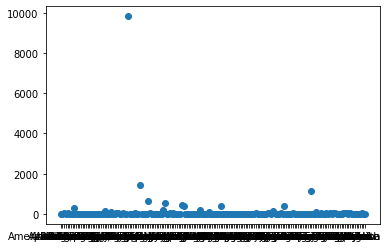

In [ ]:
plt.scatter(df_lang.index, df_lang)

                         0
Aboriginal             1.0
Albanian               1.0
AmericanSignLanguage   9.0
Arabic                31.0
Aramaic                1.0
...                    ...
Vietnamese             1.0
Wolof                  1.0
Xhosa                  2.0
Yiddish                4.0
Yoruba                 1.0

[91 rows x 1 columns]
                           0
English               1351.0
Spanish                150.0
French                 129.0
Hindi                   75.0
German                  69.0
Russian                 51.0
Italian                 41.0
Japanese                33.0
Arabic                  31.0
Mandarin                20.0
Hebrew                  14.0
Cantonese               12.0
Ukrainian               12.0
Portuguese              11.0
Turkish                 11.0
Latin                   10.0
AmericanSignLanguage     9.0
Greek                    9.0
Korean                   7.0
Polish                   6.0


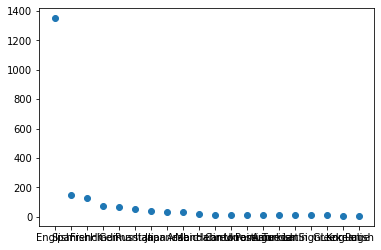

In [ ]:
print(df_lang)
#df_lang['0'].idxmax()
#df_lang = df_lang.rename_axis('index').reset_index()

df_lang[0].argmax()
#df_lang.loc[]
import copy
df_lang_test = copy.deepcopy(df_lang)
x = df_lang_test.nlargest(20,0) #df.nlargest(n,columns) columns에 '컬럼이름' 아니고 바로 컬럼이름 써주면됨
print(x)
plt.scatter(x.index, x)

#### Certificate

In [ ]:
#Certificate 원핫 인코딩 ㅇㅇ
df["Certificate"] = df["Certificate"].str.replace("'","")
df["Certificate"] = df["Certificate"].str.replace("[","")
df["Certificate"] = df["Certificate"].str.replace("]","")
df["Certificate"]

Movie_title
American Animals (2018)                        R
Step Up Revolution (2012)                  PG-13
Bad News Bears (2005)               TV-14, PG-13
American Assassin (2017)                       R
Ek Thi Daayan (2013)                   Not Rated
                                        ...     
The Remains (2016)                     Not Rated
Tiger Zinda Hai (2017)                 Not Rated
Won't You Be My Neighbor? (2018)           PG-13
xXx: State of the Union (2005)             PG-13
Anthropoid (2016)                              R
Name: Certificate, Length: 1436, dtype: object

In [ ]:
#질문
#2. 원핫 인코딩

Certificate_iter = (set(x.split(",")) for x in df.Certificate)
print("Certificate_iter:", Certificate_iter)
#1. 겉 괄호는 무엇인지? generator 찾아보기. 
#2. Certificate_iter이 

#1)고윳값
Certificate_set = sorted(set.union(*Certificate_iter)) #sorted는 정렬 함수. *는 언패킹 기능.(괄호 벗기기)
print("Certificate_set:", Certificate_set)
Unique_Certificate = []
for unique_cert in Certificate_set:
  Unique_Certificate.append(unique_cert.strip()) #띄어쓰기 없애서 다시 고유리스트로 만들기
Unique_Certificate = set(Unique_Certificate) 
Unique_Certificate
# 집합1.union(집합2) 이렇게 하면 집합1,집합2의 합집합임!

Certificate_iter: <generator object <genexpr> at 0x7fc4ce5d5db0>
Certificate_set: ['', ' G', ' NC-17', ' Not Rated', ' PG', ' PG-13', ' R', ' TV-14', ' TV-G', ' TV-MA', ' TV-PG', ' TV-Y', ' TV-Y7', ' Unrated', 'G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'Unrated']


{'',
 'G',
 'NC-17',
 'Not Rated',
 'PG',
 'PG-13',
 'R',
 'TV-14',
 'TV-G',
 'TV-MA',
 'TV-PG',
 'TV-Y',
 'TV-Y7',
 'Unrated'}

In [ ]:
#2) 0행렬 만들어주기
Certificate_mat = pd.DataFrame(np.zeros((len(df), len(Unique_Certificate))), columns=Unique_Certificate)
Certificate_mat

,,TV-14,Unrated,TV-G,TV-Y,NC-17,TV-Y7,Not Rated,PG,G,R,PG-13,TV-PG,TV-MA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(df.shape,Certificate_mat.shape)
pd.concat([df, Certificate_mat],axis = 0, ignore_index=True)
#index label
#key로 결합

(1436, 16) (1436, 14)


,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor,,TV-14,Unrated,TV-G,TV-Y,NC-17,TV-Y7,Not Rated,PG,G,R,PG-13,TV-PG,TV-MA
0,1.0,"Documentary, Biography, Crime",7.0,35319,56,NaN,2856954,"$134,793, 3 June 2018","$4,080,073","English,Dutch",['Bart Layton'],"['Bart Layton', 'Claudia Zie', 'Ed Wethered', ...","['Spencer Reinhard ...', 'Warren Lipka ...', '...",R,14 August 2018,The Orchard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,"Drama, Music, Romance",6.4,52827,39,33000000,35074677,"$11,731,708, 29 July 2012","$140,470,746",English,['Scott Speer'],"['Amanda Brody', 'Duane Adler']","['Cleopatra Coleman', 'Ryan Guzman', 'Misha Ga...",PG-13,27 July 2012,Lionsgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,"Comedy, Sport",5.8,19924,53,35000000,32868349,"$11,382,472, 24 July 2005","$34,252,847","English,Spanish",['Richard Linklater'],"['Bill Lancaster', 'Glenn Ficarra', 'John Requ...","['Billy Bob Thornton', 'Greg Kinnear ...', 'Ma...","TV-14, PG-13",22 July 2005,Paramount Pictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.0,"Action, Thriller",6.2,65944,52,33000000,36249674,"$14,846,778, 17 September 2017","$67,234,188","English,Spanish,Arabic,Polish,Turkish,Russian,...",['Michael Cuesta'],"['Stephen Schiff', 'Michael Finch', 'Edward Zw...","[""Dylan O'Brien"", 'Charlotte Vega', 'Christoph...",R,15 September 2017,Lionsgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13.0,"Horror, Romance, Thriller",5.7,3770,15,NaN,112135,"$65,857, 21 April 2013","$206,279",Hindi,['Kannan Iyer'],"['Vishal Bhardwaj', 'Vishal Bhardwaj', 'Mukul ...","['Emraan Hashmi', 'Konkona Sen Sharma', 'Kalki...",Not Rated,15 September 2017,Eros International,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Certificate_mat

,,G,PG-13,TV-14,GP,NC-17,R,TV-G,Approved,TV-Y,M/PG,Passed,Unrated,Not Rated,M,PG,TV-PG,12,TV-MA,TV-Y7-FV,TV-Y7
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11757,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11758,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
11760,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for i, certificate in enumerate(df.Certificate):
  
  Certificate_split = certificate.split(',')
  cert_stripped = []

  for cert_stripped_element in Certificate_split:
    cert_stripped.append(cert_stripped_element.strip())
    Certificate_mat.loc[i, cert_stripped_element.strip()] = 1

Certificate_mat #정상 작동.



 

In [ ]:
df

,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor,Big6_distributor
Movie_title,,,,,,,,,,,,,,,,,
American Animals (2018),1,"Documentary, Biography, Crime",7.0,35319,116,NaN,2856954,"$134,793, 3 June 2018","$4,080,073","English,Dutch",['Bart Layton'],"['Bart Layton', 'Claudia Zie', 'Ed Wethered', ...","['Spencer Reinhard ...', 'Warren Lipka ...', '...",R,14 August 2018,The Orchard,0
Step Up Revolution (2012),3,"Drama, Music, Romance",6.4,52827,99,33000000,35074677,"$11,731,708, 29 July 2012","$140,470,746",English,['Scott Speer'],"['Amanda Brody', 'Duane Adler']","['Cleopatra Coleman', 'Ryan Guzman', 'Misha Ga...",PG-13,27 July 2012,Lionsgate,0
Bad News Bears (2005),4,"Comedy, Sport",5.8,19924,113,35000000,32868349,"$11,382,472, 24 July 2005","$34,252,847","English,Spanish",['Richard Linklater'],"['Bill Lancaster', 'Glenn Ficarra', 'John Requ...","['Billy Bob Thornton', 'Greg Kinnear ...', 'Ma...","TV-14, PG-13",22 July 2005,Paramount Pictures,1
American Assassin (2017),7,"Action, Thriller",6.2,65944,112,33000000,36249674,"$14,846,778, 17 September 2017","$67,234,188","English,Spanish,Arabic,Polish,Turkish,Russian,...",['Michael Cuesta'],"['Stephen Schiff', 'Michael Finch', 'Edward Zw...","[""Dylan O'Brien"", 'Charlotte Vega', 'Christoph...",R,15 September 2017,Lionsgate,0
Ek Thi Daayan (2013),13,"Horror, Romance, Thriller",5.7,3770,135,NaN,112135,"$65,857, 21 April 2013","$206,279",Hindi,['Kannan Iyer'],"['Vishal Bhardwaj', 'Vishal Bhardwaj', 'Mukul ...","['Emraan Hashmi', 'Konkona Sen Sharma', 'Kalki...",Not Rated,15 September 2017,Eros International,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Screen Door Jesus (2003),497,"Comedy, Drama, Fantasy",5.2,115,119,3000000,59000,"$6,040, 2 October 2005","$59,000",English,['Kirk Davis'],"['Christopher Cook', 'Kirk Davis']","['Myk Watford ... Sheriff', 'Lafayette Wright'...",R,10 May 2019,Indican Pictures,0
Fracture (2007),498,"Crime, Drama, Thriller",7.2,181723,113,NaN,39015018,"$11,180,000, 22 April 2007","$92,011,561",English,['Gregory Hoblit'],"['Daniel Pyne', 'Glenn Gers', 'Daniel Pyne']","['Anthony Hopkins ...', 'Ryan Gosling', 'David...",R,20 April 2007,New Line Cinema,0
Ferdinand (2017),499,"Animation, Adventure, Comedy",6.7,45856,108,111000000,84410380,"$13,401,586, 17 December 2017","$296,069,199","English,Spanish,German",['Carlos Saldanha ...'],"['Robert L. Baird', 'Tim Federle', 'Brad Copel...","['Jack Gore', 'Jet Jurgensmeyer', 'Nile Diaz',...","TV-G, TV-PG, PG",15 December 2017,Twentieth Century Fox,0


#### Distributor

In [ ]:
df.Domestic_distributor

Movie_title
American Animals (2018)                                        The Orchard
Step Up Revolution (2012)                                        Lionsgate
Bad News Bears (2005)                                   Paramount Pictures
American Assassin (2017)                                         Lionsgate
Ek Thi Daayan (2013)                                    Eros International
                                                           ...            
Screen Door Jesus (2003)                                  Indican Pictures
Fracture (2007)                                            New Line Cinema
Ferdinand (2017)                                     Twentieth Century Fox
L'odyssée d'Alice Tremblay (2002)               Alliance Atlantis Vivafilm
Revelation: Dawn of Global Government (2016)       Rocky Mountain Pictures
Name: Domestic_distributor, Length: 11762, dtype: object

Pandas Series에는 문자열 처리기능 대단!
df.column1은 Series임. 

df['column1'].str.contains()는 특정 문자열있는지 확인.


In [ ]:
Big6_dist_list = ["Walt Disney","Warner Bros.","Sony Pictures","Universal","20th Century Fox","Paramount Pictures"] 

In [ ]:
def am_i_big6(distributor):
  Big6_dist_list = ["Walt Disney","Warner Bros.","Sony Pictures","Universal","20th Century Fox","Paramount Pictures"] 
  if pd.isnull(distributor):
    return 0
    #np.nan

  if distributor in Big6_dist_list:
    return 1
  else:
    return 0

In [ ]:
df['Big6_distributor'] = df['Domestic_distributor'].apply(am_i_big6)
counting1 = df['Big6_distributor'].sum(axis = 0)
counting1 #215개가 big6라함.


729

In [ ]:
df

,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor,Big6_distributor
Movie_title,,,,,,,,,,,,,,,,,
American Animals (2018),1,"Documentary, Biography, Crime",7.0,35319,116,NaN,2856954,"$134,793, 3 June 2018","$4,080,073","English,Dutch",['Bart Layton'],"['Bart Layton', 'Claudia Zie', 'Ed Wethered', ...","['Spencer Reinhard ...', 'Warren Lipka ...', '...",R,14 August 2018,The Orchard,0
Step Up Revolution (2012),3,"Drama, Music, Romance",6.4,52827,99,33000000,35074677,"$11,731,708, 29 July 2012","$140,470,746",English,['Scott Speer'],"['Amanda Brody', 'Duane Adler']","['Cleopatra Coleman', 'Ryan Guzman', 'Misha Ga...",PG-13,27 July 2012,Lionsgate,0
Bad News Bears (2005),4,"Comedy, Sport",5.8,19924,113,35000000,32868349,"$11,382,472, 24 July 2005","$34,252,847","English,Spanish",['Richard Linklater'],"['Bill Lancaster', 'Glenn Ficarra', 'John Requ...","['Billy Bob Thornton', 'Greg Kinnear ...', 'Ma...","TV-14, PG-13",22 July 2005,Paramount Pictures,1
American Assassin (2017),7,"Action, Thriller",6.2,65944,112,33000000,36249674,"$14,846,778, 17 September 2017","$67,234,188","English,Spanish,Arabic,Polish,Turkish,Russian,...",['Michael Cuesta'],"['Stephen Schiff', 'Michael Finch', 'Edward Zw...","[""Dylan O'Brien"", 'Charlotte Vega', 'Christoph...",R,15 September 2017,Lionsgate,0
Ek Thi Daayan (2013),13,"Horror, Romance, Thriller",5.7,3770,135,NaN,112135,"$65,857, 21 April 2013","$206,279",Hindi,['Kannan Iyer'],"['Vishal Bhardwaj', 'Vishal Bhardwaj', 'Mukul ...","['Emraan Hashmi', 'Konkona Sen Sharma', 'Kalki...",Not Rated,15 September 2017,Eros International,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Screen Door Jesus (2003),497,"Comedy, Drama, Fantasy",5.2,115,119,3000000,59000,"$6,040, 2 October 2005","$59,000",English,['Kirk Davis'],"['Christopher Cook', 'Kirk Davis']","['Myk Watford ... Sheriff', 'Lafayette Wright'...",R,10 May 2019,Indican Pictures,0
Fracture (2007),498,"Crime, Drama, Thriller",7.2,181723,113,NaN,39015018,"$11,180,000, 22 April 2007","$92,011,561",English,['Gregory Hoblit'],"['Daniel Pyne', 'Glenn Gers', 'Daniel Pyne']","['Anthony Hopkins ...', 'Ryan Gosling', 'David...",R,20 April 2007,New Line Cinema,0
Ferdinand (2017),499,"Animation, Adventure, Comedy",6.7,45856,108,111000000,84410380,"$13,401,586, 17 December 2017","$296,069,199","English,Spanish,German",['Carlos Saldanha ...'],"['Robert L. Baird', 'Tim Federle', 'Brad Copel...","['Jack Gore', 'Jet Jurgensmeyer', 'Nile Diaz',...","TV-G, TV-PG, PG",15 December 2017,Twentieth Century Fox,0



질문
2. 원핫 인코딩

Distributor_iter = (set(x.split(",")) for x in df.Domestic_distributor)
print("Distributor_iter:", Distributor_iter)
1. 겉 괄호는 무엇인지? generator 찾아보기. 
2. Genre_iter이 

1)장르 고윳값 ex Action, Horror 등만 추출
Distributor_set = sorted(set.union(*Distributor_iter)) #sorted는 정렬 함수. *는 언패킹 기능.(괄호 벗기기)
print("Genre_set:", Distributor_set)
 집합1.union(집합2) 이렇게 하면 집합1,집합2의 합집합임!

2) 0행렬 만들어주기
Genre_mat = pd.DataFrame(np.zeros((len(df), len(Genre_set))), columns=Genre_set)
Genre_mat

해당하는 Genre에 1 채워주기. 논리? 이해 완료.
for i, genre in enumerate(df.Genre):
  Genre_mat.loc[i, genre.split(',')] = 1
  #print(Genre_mat.loc[i, genre.split(',')]) #if 안쓰고도 df.loc[i행,[컬럼1,컬럼2]]하면 df에서 해당하는 컬럼1,2에 접근 가능.
  #print(genre.split(',')) #['Documentary', ' Biography', ' Crime'] 이런식으로 나옴.
Genre_mat

In [ ]:
#Cumulative Worldwide Gross
df["Cumulative Worldwide Gross"] = df["Cumulative Worldwide Gross"].str.replace("$","")
df["Cumulative Worldwide Gross"] = df["Cumulative Worldwide Gross"].str.replace(",","")

#Language 원핫인코딩 총 몇개?
"""
df["Language"] = df["Language"].str.replace("[","")
df["Language"] = df["Language"].str.replace("]","")
df["Language"] = df["Language"].str.replace("'","")
"""
#Directors	원핫인코딩ㄴㄴ
"""
df["Directors"] = df["Directors"].str.replace("[","")
df["Directors"] = df["Directors"].str.replace("]","")
df["Directors"] = df["Directors"].str.replace("'","")
"""
#Writers	원핫인코딩ㄴㄴ
"""
df["Writers"] = df["Writers"].str.replace("[","")
df["Writers"] = df["Writers"].str.replace("]","")
df["Writers"] = df["Writers"].str.replace("'","")
"""
#Stars 원핫 인코딩ㄴㄴ
"""
df["Stars"] = df["Stars"].str.replace("[","")
df["Stars"] = df["Stars"].str.replace("]","")
df["Stars"] = df["Stars"].str.replace("'","")
"""
#Certificate 원핫 인코딩 ㅇㅇ
"""
df["Certificate"] = df["Certificate"].str.replace("'","")
df.head()
"""
#Domestic_distributor 원핫인코딩 ㄴㄴ.

df

In [ ]:
len(set(df.Domestic_distributor))

In [ ]:

#Genre정리 +원핫인코딩
df["Genre"] = df["Genre"].str.replace("[","")
df["Genre"] = df["Genre"].str.replace("]","")
df["Genre"] = df["Genre"].str.replace("'","")
#Rate 정리
df["Rate"] = df["Rate"].str.replace("[","")
df["Rate"] = df["Rate"].str.replace("]","")
df["Rate"] = df["Rate"].str.replace("'","")

#Rating_count 정리
df["Rating_count"] = df["Rating_count"].str.replace(",","")

#Run_time	
df["Run_time"] = df["Run_time"].str.replace("[","")
df["Run_time"] = df["Run_time"].str.replace("]","")
df["Run_time"] = df["Run_time"].str.replace("'","")

#Budget
df["Budget"] = df["Budget"].str.replace("$","")
df["Budget"] = df["Budget"].str.replace("'","")
df["Budget"] = df["Budget"].str.replace("(estimated)","")
df["Budget"] = df["Budget"].str.replace(",","")
#Gross_USA
df["Gross_USA"] = df["Gross_USA"].str.replace("$","")
df["Gross_USA"] = df["Gross_USA"].str.replace("'","")
df["Gross_USA"] = df["Gross_USA"].str.replace(",","")
#Opening Weekend USA
df["Opening Weekend USA"] = df["Opening Weekend USA"].str.replace("$","")
df["Opening Weekend USA"] = df["Opening Weekend USA"].str.replace("'","")
df["Opening Weekend USA"] = df["Opening Weekend USA"].str.replace(",","")

#Cumulative Worldwide Gross
df["Cumulative Worldwide Gross"] = df["Cumulative Worldwide Gross"].str.replace("$","")
df["Cumulative Worldwide Gross"] = df["Cumulative Worldwide Gross"].str.replace(",","")

#Language
df["Language"] = df["Language"].str.replace("[","")
df["Language"] = df["Language"].str.replace("]","")
df["Language"] = df["Language"].str.replace("'","")
#Directors	
df["Directors"] = df["Directors"].str.replace("[","")
df["Directors"] = df["Directors"].str.replace("]","")
df["Directors"] = df["Directors"].str.replace("'","")

#Writers	
df["Writers"] = df["Writers"].str.replace("[","")
df["Writers"] = df["Writers"].str.replace("]","")
df["Writers"] = df["Writers"].str.replace("'","")
#Stars
df["Stars"] = df["Stars"].str.replace("[","")
df["Stars"] = df["Stars"].str.replace("]","")
df["Stars"] = df["Stars"].str.replace("'","")

#Certificate
df["Certificate"] = df["Certificate"].str.replace("'","")
df.head()

#Domestic_distributor 원핫인코딩.


In [ ]:
# 나중에  점검.
#1. 학습 시 released year은 제외한다.
#2. 원핫인코딩한 Certificate, Genre 점검